In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

In [3]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

yes_no_to_bool = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_to_bool)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [4]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

yes_no_to_bool = {
    'Yes': True,
    'No': False
}

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_to_bool)
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [5]:
cols_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
}
star_wars = star_wars.rename(columns=cols_dict)
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


In [6]:
import numpy as np
name_to_bool = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan : False
}

def print_value_counts(s):
    print(star_wars.iloc[:,i].value_counts(dropna=False))

for i in range(3,9):
    print_value_counts(i)
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(name_to_bool)
    print_value_counts(i)
    print('\n')

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
True     673
False    513
Name: seen_1, dtype: int64


NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64


NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64


Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64


Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64


Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: se

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [8]:
col_dict_2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars = star_wars.rename(columns=col_dict_2)
print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


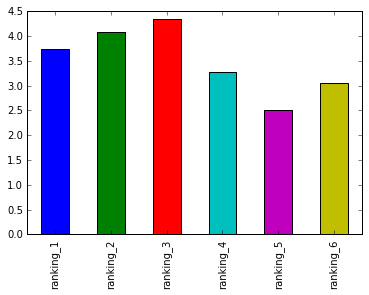

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars.iloc[:,9:15].mean().plot.bar()

Recall that each value in the chart above represents the rank among the series which means that a lower value implies better review. Respondents preferred 'Star Wars: Episode V The Empire Strikes Back' the best and 'Star Wars: Episode III  Revenge of the Sith' the least.

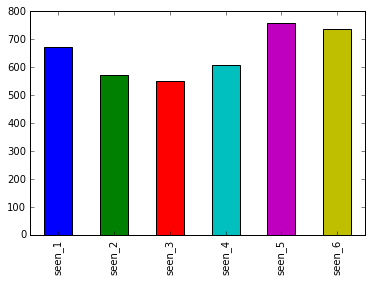

In [10]:
star_wars.iloc[:,3:9].sum().plot.bar()

We plotted total number of views of each movie. As you can see above, it indicates that 'Star Wars: Episode V The Empire Strikes Back' has the highest view and 'Star Wars: Episode III Revenge of the Sith' contains the lowest view. 

In [11]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Axes(0.125,0.125;0.775x0.775)


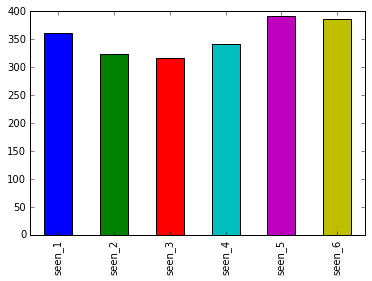

In [13]:
males.iloc[:,9:15].mean().plot.bar()

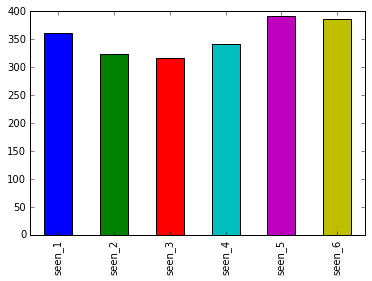

In [14]:
males.iloc[:,3:9].sum().plot.bar()

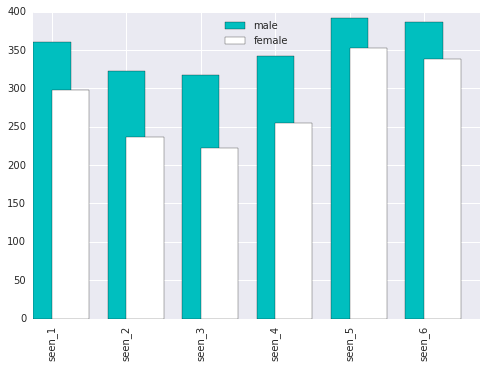

In [82]:
fig, ax = plt.subplots()
ax1 = males.iloc[:,3:9].sum().plot.bar(color='c', label='male', align='center')
ax2 = females.iloc[:, 3:9].sum().plot.bar(color='w', label='female', align='edge')
plt.legend(loc='best')
plt.show()

Notice that male population has comparable movie views than female. On the other hand, both gender shows the identical inclination.

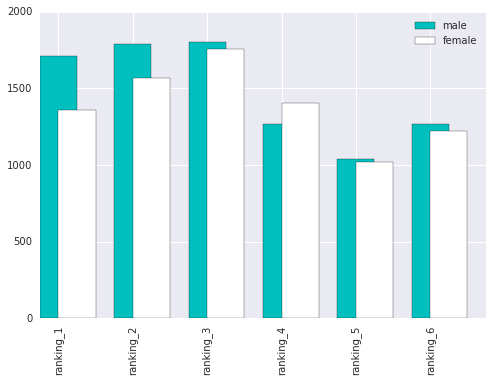

In [83]:
fig, ax = plt.subplots()
ax1 = males.iloc[:,9:15].sum().plot.bar(color='c', label='male', align='center')
ax2 = females.iloc[:, 9:15].sum().plot.bar(color='w', label='female', align='edge')
plt.legend(loc='best')
plt.show()

We can observe that both gender exhibit quite equal preference for the each movie.

- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.<br>
&nbsp; 1. Which character do respondents like the most?<br>
&nbsp; 2. Which character do respondents dislike the most?<br>
&nbsp; 3. Which character is the most controversial (split between likes and dislikes)?